In [1]:
# Import libraries
import pandas as pd
import requests

In [2]:
api_key = 'DEMO_KEY'
#food_list = "534358,373052,616350"

In [3]:
food_list = input("Enter the FDC IDs of your meal:")
print(food_list)

Enter the FDC IDs of your meal:534358,373052,616350
534358,373052,616350


In [4]:
#Load data via API in JSON format
url = "https://api.nal.usda.gov/fdc/v1/foods?api_key="+api_key+"&fdcIds="+food_list+"" 
rawdata = requests.get(url).json() 

In [5]:
#Convert JSON datafile into dataframe
df = pd.json_normalize(rawdata) 

In [6]:
#Delete several variables
df.pop('foodComponents')
df.pop('foodAttributes')
df.pop('foodPortions')
df.pop('publicationDate')
df.pop('foodNutrients')
df.pop('foodClass')
df.pop('modifiedDate')
df.pop('availableDate')
df.pop('brandOwner')
df.pop('dataSource')
df.pop('brandedFoodCategory')
df.pop('gtinUpc')
df.pop('householdServingFullText')
df.pop('marketCountry')
df.pop('foodUpdateLog')
df.pop('ingredients')
df.pop('dataType')
df.pop('servingSize')
df.pop('servingSizeUnit')
df.pop('description')
df.pop('fdcId')

0    534358
1    373052
2    616350
Name: fdcId, dtype: int64

In [7]:
#Rename Nutrient Columns
df.rename(columns={"labelNutrients.fat.value": "Fat",
                  "labelNutrients.saturatedFat.value": "Saturated Fat",	
                  "labelNutrients.transFat.value": "Trans Fat",	
                  "labelNutrients.cholesterol.value": "Cholesterol",	
                  "labelNutrients.sodium.value": "Sodium",	
                  "labelNutrients.carbohydrates.value": "Carbohydrates",	
                  "labelNutrients.fiber.value": "Fiber",	
                  "labelNutrients.sugars.value": "Sugars",	
                  "labelNutrients.protein.value": "Protein",	
                  "labelNutrients.calcium.value": "Calcium",	
                  "labelNutrients.iron.value": "Iron",	
                  "labelNutrients.potassium.value": "Potassium",	
                  "labelNutrients.calories.value": "Calories",	
                  "labelNutrients.addedSugar.value": "AddedSugar"}, inplace=True)

In [8]:
sumtotal=df.sum().to_frame().rename(columns={0:'value'})

In [9]:
sumtotal

,value
Fat,21.00
Saturated Fat,7.00
Trans Fat,0.00
Cholesterol,10.20
Sodium,200.00
Carbohydrates,58.00
Fiber,3.01
Sugars,27.00
Protein,9.00
Calcium,59.60


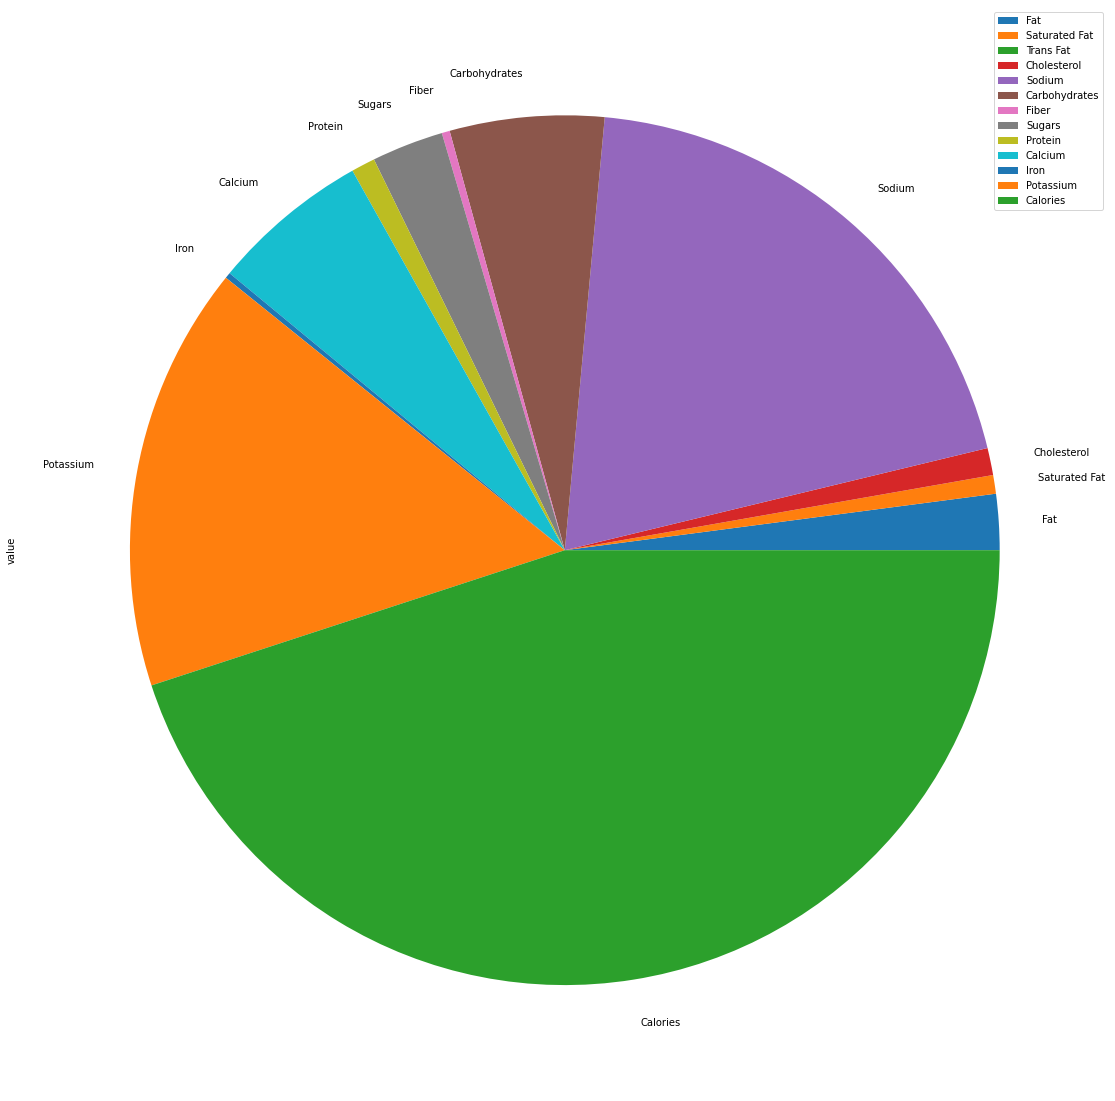

In [10]:
sumtotal.plot.pie(y='value',  figsize=(20, 20)).get_figure().savefig('output.png')